# Maaz Saeed | 2021268
#### Lab 02
#### Taylor Series and Bisection Method

### Task 01 - Nth Order Derivative

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, factorial, cos, sin

In [3]:
def nth_deriv(f, var,n):
    return diff(f, var, n)
# return the nth derivative of the symbolic function passes in as f

In [4]:
x = symbols('x')
fx = x**5 + x**4

In [5]:
nth_deriv(fx, x, 2)

4*x**2*(5*x + 3)

### Task 02 - Taylor Series

In [6]:
def taylor_series(f, a, n):
    E = 0
    if n > -1:
        return taylor_series(f, a, n - 1) + ((nth_deriv(f, x, n).subs(x, a) * (x - a)**n) / factorial(n))
    return 0


fx = cos(x)

taylor_series(fx, 0, 5)


def cos_taylor(x_vals, order):
    E = np.zeros_like(x_vals)  
    for n in range((order // 2) + 1):
        term = ((-1) ** n * x_vals ** (2 * n)) / float(factorial(2 * n))  
        E += term
    return E


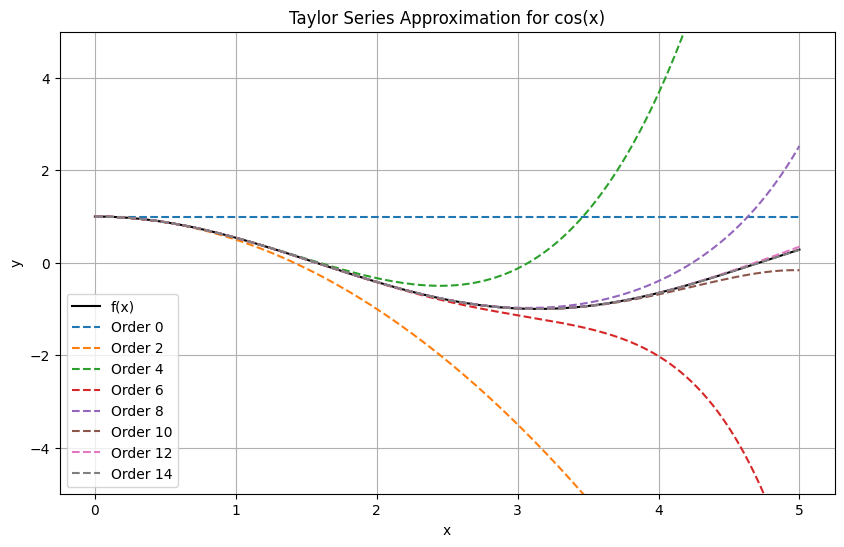

In [7]:
# n_terms = 10
# a = 0
# taylor_expansion = taylor_series(fx, a, n_terms)

# x_vals = np.linspace(1, 5, 400)
# fx_lambdify = lambdify(x, fx, "numpy")
# taylor_expansion_lambdify = lambdify(x, taylor_expansion, "numpy")

# y_vals = fx_lambdify(x_vals)
# taylor_vals = taylor_expansion_lambdify(x_vals)

x_vals = np.linspace(0, 5, 400)
y_vals = np.cos(x_vals)
orders = [0, 2, 4, 6, 8, 10, 12, 14]
taylors = {order: [lambdify(x, taylor_series(fx, 0, order), 'numpy')(xi) for xi in x_vals] for order in orders}


plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)", color='black')
for order in orders:
    plt.plot(x_vals, taylors[order], label=f'Order {order}', linestyle='--')

plt.title("Taylor Series Approximation for cos(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-5, 5)
plt.legend()
plt.grid()
plt.show()

### Task 03 - Bisection Method

In [8]:
def find_roots_bisection(f, a, b, tol):
    while b - a > tol:
        c = (a + b) / 2
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c            

In [9]:
a, b = 1, 23 # interval [1, 2]
tol = 0.0001 # tolerance
def f(x):
    return x**3 - x - 1

print("Root: ", find_roots_bisection(f, a, b, tol))

Root:  1.3246994018554688
